# project: investigate No Show Appointment Dataset

## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. We are trying to predict the most important factors that affect the atendance of the patient

 **Dataset columns descriptions:**


 * PatientId - Patient identification.
 * AppointmentID - Appointment identification. 
 * Gender -  Patient gender (Male or Female).
 * ScheduledDay - The day patient set up their appointment.
 * AppointmentDay - The day of actual appointment when patient have to visit the doctor.
 * Age - patient Age
 * Neighbourhood - Hospital location.
 * Scholarship - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(0 for no & 1 for Yes).
 * Hipertension - Indicates whether or not the patient has hypertension or not(0 for no & 1 for Yes).
 * Diabetes - Indicates whether or not the patient has diabetes or not (0 for no & 1 for Yes).
 * Alcoholism - Indicates whether or not the patient has alcoholism or not (0 for no & 1 for Yes).
 * Handicap - Indicates whether or not the patient has handicap or not (on scale from 0 to 4 )
 * SMS_received = Indicates whether or not the patient received SMS (0 for no & 1 for Yes)
 * No-show = Indicates whether or not the patient attend the appointment(Yes for didn't show, No for show)
 
questions we can ask to explore the data:
* What is the percentage of each gender?
* What is the ratio of alcohol takers to non-alcohol takers?
* What percent of patients received an sms?
* What percent of the patients completed the medical process?
* Which Age group is the most common age group among patients?
* What was the most common time range that patients had to wait?
* What is the relationship between the handicap patients and the time they wait for their appointments?
* What is the relationship between the scholars and the waiting time?
* What is the relationship between the gender and waiting time?
* Which day of the week is the most frequent for appointments?
* Relationship between the gender of patients and handicap patients?
* 


In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline 

## ACCESSING THE DATA

In [2]:
# Reading the csv file into the dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking the datatype and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Checking for duplicate rows or records
df.duplicated().sum()

0

In [5]:
# Checking whether there are unique 
df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64

In [6]:
# Checking for null values
df.isnull().sum().sum()

0

In [7]:
# Checking the values assigned to records in the Handcap column
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [8]:
# Checking the age assigned to each record 
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [9]:
# Checking for errors in the entries
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
df.nsmallest(20,'Age')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes


## OBSERVATION
### QUALITY
 - Incorrect column names
 - The age column has outliers
 - Better parameters for various columns instead of 0,1,2,3 and 4
 - Change the datatype of the scheduled day,appointment day,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap columns
 - Create a waiting time column to find out the time patients waited to be attended to
 - The values for the Scholarship,Hipertension,Diabetes,Alcoholism,Handcap columns should be more explanatory
 - The values in the neighbourhood column should be in proper case
 

## CLEANING

In [11]:
# Creating a copy of the dataframe
clean_df = df.copy()

### Renaming the incorrect column names

In [12]:
clean_df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap',
                'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','No-show':'No_show'} , inplace = True)

In [13]:
# Testing the code
clean_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_show'],
      dtype='object')

### Fixing the Age column values

<AxesSubplot:xlabel='Age'>

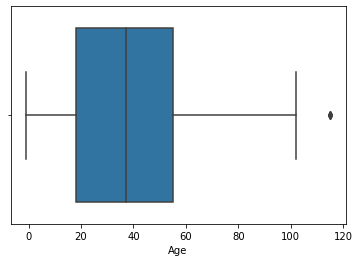

In [14]:
# the -1 is an outlier because it isnt possible while the 115 is possible but will be considered an outlier due to the boxplot show below
sb.boxplot(x=clean_df.Age)

In [15]:
clean_df = clean_df[(clean_df.Age > 0 ) & (clean_df.Age != 115)]


102
1


<AxesSubplot:xlabel='Age'>

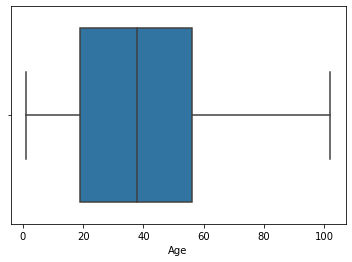

In [16]:
# Testing the code
print(clean_df.Age.max())
print(clean_df.Age.min())
sb.boxplot(x=clean_df.Age)

### Substituting better parameters for various columns

In [17]:
for col in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No_show']:
    clean_df[col] = clean_df[col].replace({0:'No',1:'Yes'})

In [18]:
# Testing the code
clean_df.head()

,PatientId,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,0,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,0,No,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,0,No,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,No


### Changing the datatype of some columns

In [19]:
clean_df.Handicap = clean_df.Handicap.astype('category')
clean_df['Scheduled_Day'] = pd.to_datetime(clean_df['Scheduled_Day'])
clean_df['Appointment_Day'] =  pd.to_datetime(clean_df['Appointment_Day'])

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        106982 non-null  float64            
 1   AppointmentID    106982 non-null  int64              
 2   Gender           106982 non-null  object             
 3   Scheduled_Day    106982 non-null  datetime64[ns, UTC]
 4   Appointment_Day  106982 non-null  datetime64[ns, UTC]
 5   Age              106982 non-null  int64              
 6   Neighbourhood    106982 non-null  object             
 7   Scholarship      106982 non-null  object             
 8   Hypertension     106982 non-null  object             
 9   Diabetes         106982 non-null  object             
 10  Alcoholism       106982 non-null  object             
 11  Handicap         106982 non-null  category           
 12  SMS_received     106982 non-null  object             
 13 

### Obtaining the waiting times and day of appointment columns

In [21]:
clean_df.insert(5,'Waiting_time_in_days',(clean_df['Appointment_Day'] - clean_df['Scheduled_Day']).dt.total_seconds()/(3600*24))
                

In [22]:
clean_df = clean_df[clean_df['Waiting_time_in_days'] >= 0]
clean_df.Waiting_time_in_days=clean_df.Waiting_time_in_days.round(2)

In [23]:
clean_df.insert(5,'Day_of_Appointment',clean_df.Appointment_Day.dt.day_name())

In [24]:
clean_df.head()

,PatientId,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Day_of_Appointment,Waiting_time_in_days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,Friday,1.64,76,REPÚBLICA,No,Yes,No,No,0,No,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,Friday,1.37,23,GOIABEIRAS,No,No,No,No,0,No,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,Friday,1.35,39,GOIABEIRAS,No,No,No,No,0,No,Yes
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,Friday,1.47,19,CONQUISTA,No,No,No,No,0,No,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,Friday,1.38,30,NOVA PALESTINA,No,No,No,No,0,No,No


### Changing the case of the neighbourhood column

In [25]:
clean_df.Neighbourhood = clean_df.Neighbourhood.str.title()

In [26]:
clean_df.sample(5)

,PatientId,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Day_of_Appointment,Waiting_time_in_days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
83488,1.416854e+14,5733304,F,2016-05-24 13:40:49+00:00,2016-05-30 00:00:00+00:00,Monday,5.43,33,Maria Ortiz,No,No,No,No,0,Yes,No
98789,4.599121e+12,5720960,F,2016-05-19 14:59:53+00:00,2016-06-02 00:00:00+00:00,Thursday,13.38,24,Caratoíra,No,No,No,No,0,Yes,No
18253,6.898155e+12,5676095,F,2016-05-09 14:57:23+00:00,2016-05-11 00:00:00+00:00,Wednesday,1.38,3,Resistência,No,No,No,No,0,No,Yes
29603,3.361362e+09,5716639,F,2016-05-19 07:02:19+00:00,2016-05-25 00:00:00+00:00,Wednesday,5.71,26,São José,No,No,No,No,0,No,No
56319,9.851395e+13,5642470,F,2016-04-29 16:02:45+00:00,2016-05-30 00:00:00+00:00,Monday,30.33,46,São Benedito,No,No,No,No,0,No,No


### Dropping the AppointmentID colummn since all its values are unique

In [27]:
clean_df = clean_df.drop(columns='AppointmentID')

In [28]:
# Testing the Code 
clean_df.columns

Index(['PatientId', 'Gender', 'Scheduled_Day', 'Appointment_Day',
       'Day_of_Appointment', 'Waiting_time_in_days', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')

### Making the No_show column easier to understand by renaming the column and its values

In [29]:
clean_df.rename(columns={'No_show':'Completion_status'} , inplace = True)

In [30]:
clean_df['Completion_status'].replace({'No':'Complete','Yes':'Incomplete'},inplace = True)

### Storing the Dataframe in a Csv file

In [31]:
clean_df.to_csv('noshowappointments-may-2016.csv')

## Exploratory Data Analysis

In [32]:
clean_df.sample(10)

,PatientId,Gender,Scheduled_Day,Appointment_Day,Day_of_Appointment,Waiting_time_in_days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Completion_status
21619,7.443276e+13,F,2016-05-10 17:22:55+00:00,2016-05-20 00:00:00+00:00,Friday,9.28,66,Santo André,No,Yes,Yes,No,0,No,Incomplete
97234,6.528387e+11,F,2016-06-02 12:00:00+00:00,2016-06-06 00:00:00+00:00,Monday,3.50,57,Cruzamento,No,Yes,Yes,No,0,Yes,Complete
6484,1.859465e+13,M,2016-04-28 15:51:58+00:00,2016-05-02 00:00:00+00:00,Monday,3.34,60,São Cristóvão,No,Yes,No,No,0,Yes,Complete
100278,7.623436e+13,M,2016-05-25 11:27:41+00:00,2016-06-07 00:00:00+00:00,Tuesday,12.52,67,Da Penha,No,Yes,Yes,No,0,Yes,Complete
34365,5.373364e+13,F,2016-05-11 08:57:00+00:00,2016-05-17 00:00:00+00:00,Tuesday,5.63,28,Santo André,Yes,No,No,No,0,No,Complete
37283,8.754349e+13,M,2016-05-24 13:49:42+00:00,2016-05-31 00:00:00+00:00,Tuesday,6.42,13,Jucutuquara,No,No,No,No,0,Yes,Incomplete
20208,1.541500e+14,F,2016-05-20 07:20:28+00:00,2016-05-25 00:00:00+00:00,Wednesday,4.69,50,Redenção,No,No,No,No,0,Yes,Complete
17867,6.268984e+12,M,2016-05-02 07:52:06+00:00,2016-05-05 00:00:00+00:00,Thursday,2.67,49,Santa Martha,No,No,No,Yes,0,No,Complete
95580,5.187696e+13,F,2016-05-18 14:26:16+00:00,2016-06-08 00:00:00+00:00,Wednesday,20.40,18,Inhanguetá,No,No,No,No,0,Yes,Incomplete
49239,1.282551e+13,F,2016-05-16 09:49:06+00:00,2016-05-17 00:00:00+00:00,Tuesday,0.59,73,Jardim Da Penha,No,Yes,No,No,0,No,Complete


### What is the percentage of each gender?

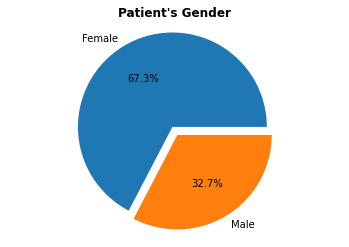

In [33]:
gender = clean_df.Gender.value_counts()
plt.pie(gender,
       labels=['Female','Male'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0.1,0)
       )
plt.title("Patient's Gender",fontweight = 'bold')
plt.axis('equal');

The female gender had more appointments than the male

### What is the ratio of alcohol takers to non-alcohol takers?

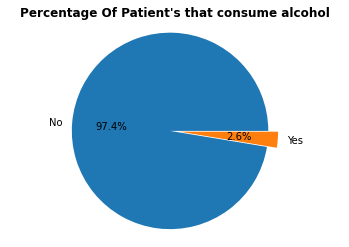

In [34]:
alcohol = clean_df.Alcoholism.value_counts()
plt.pie(alcohol,
       labels=['No','Yes'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0.1,0)
       )
plt.title("Percentage Of Patient's that consume alcohol",fontweight = 'bold')
plt.axis('equal');

Very few patients consume alcohol

### What percent of patients received an sms?

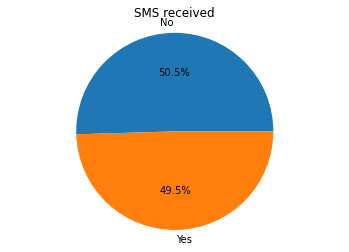

In [35]:
sms = clean_df.SMS_received.value_counts()
plt.pie(sms,
       labels=['No','Yes'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0,0)
       )
plt.title("SMS received")
plt.axis('equal');

Almost half of the patients received an email from the hospital

### What percent of the patients completed the medical process?

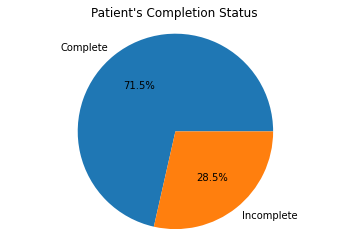

In [36]:
sho = clean_df.Completion_status.value_counts()
plt.pie(sho,
       labels=['Complete','Incomplete'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0,0)
       )
plt.title("Patient's Completion Status")
plt.axis('equal');

Most patients did completed the medical process 

### Which Age group is the most common age group among patients?

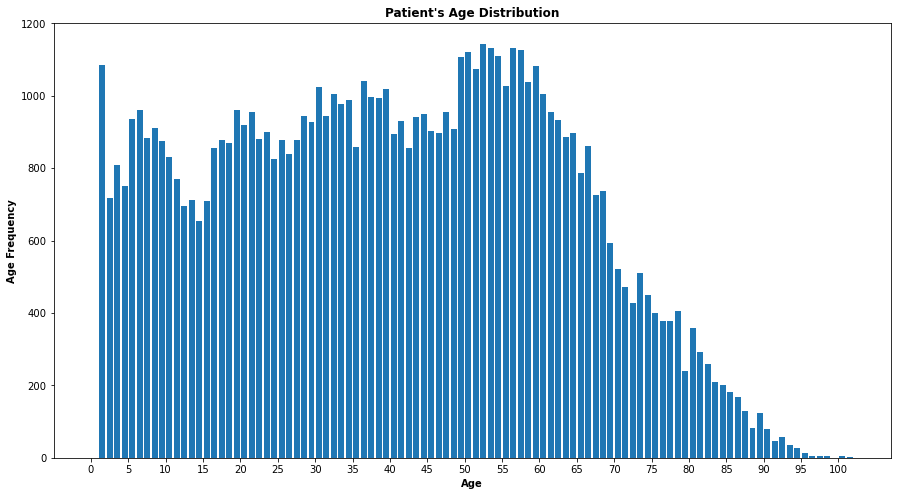

In [37]:
plt.figure(figsize=[15,8])
bins=np.arange(0,103,1)
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=clean_df,x='Age',bins=bins,rwidth=0.8)
plt.title("Patient's Age Distribution",y=1 ,fontweight = 'bold')
plt.xlabel('Age',fontweight = 'bold')
plt.ylabel('Age Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

The data is almost randomly distributed because at the extreme right side the data is skewed

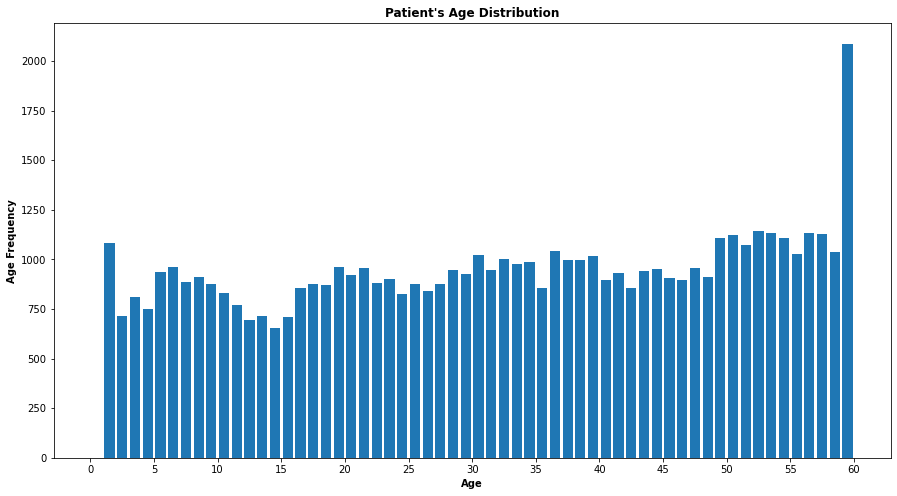

In [38]:
plt.figure(figsize=[15,8])
bins=np.arange(0,61,1)
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=clean_df.query('Age <= 60'),x='Age',bins=bins,rwidth=0.8)
plt.title("Patient's Age Distribution",y=1 ,fontweight = 'bold')
plt.xlabel('Age',fontweight = 'bold')
plt.ylabel('Age Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

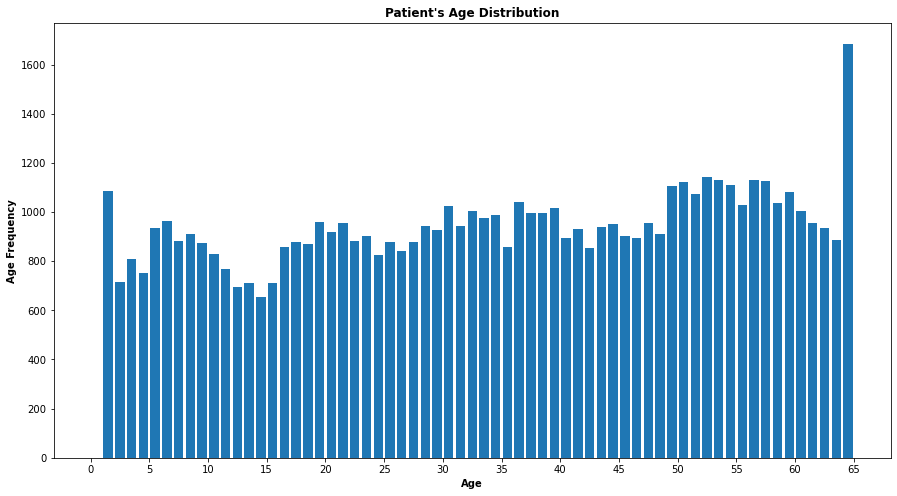

In [39]:
plt.figure(figsize=[15,8])
bins=np.arange(0,66,1)
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=clean_df.query('Age <= 65'),x='Age',bins=bins,rwidth=0.8)
plt.title("Patient's Age Distribution",y=1 ,fontweight = 'bold')
plt.xlabel('Age',fontweight = 'bold')
plt.ylabel('Age Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

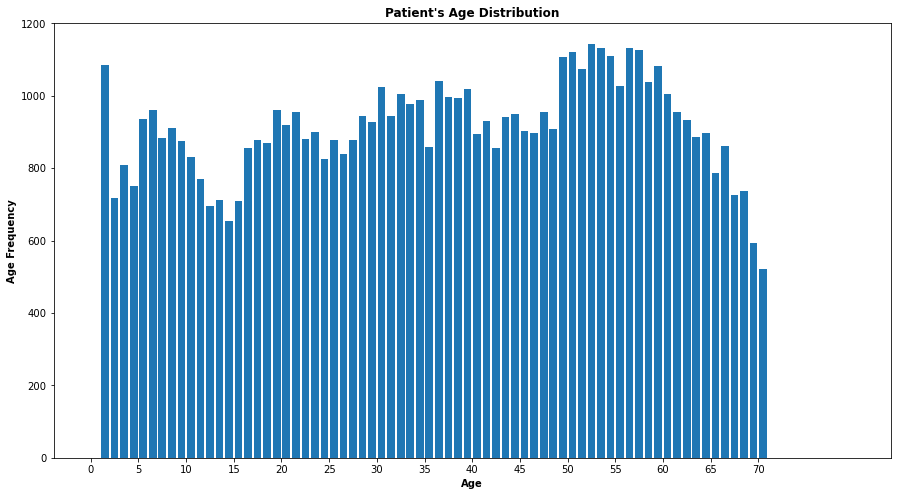

In [40]:
plt.figure(figsize=[15,8])
bins=np.arange(0,81,1)
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=clean_df.query('Age <= 70'),x='Age',bins=bins,rwidth=0.8)
plt.title("Patient's Age Distribution",y=1 ,fontweight = 'bold')
plt.xlabel('Age',fontweight = 'bold')
plt.ylabel('Age Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

From the histograms above due to the different boundaries set we can see that the highest peak of this distribution is between the 50-60 age mark though this data has several peaks

### What was the most common time range that patients had to wait? 

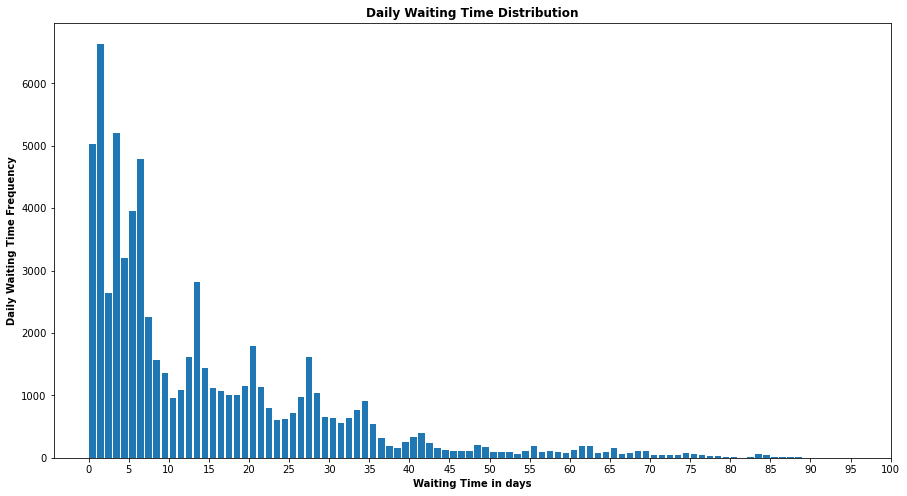

In [41]:
plt.figure(figsize=[15,8])
bins=np.arange(0,90,1)
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=clean_df,x='Waiting_time_in_days',bins=bins,rwidth=0.8)
plt.title("Daily Waiting Time Distribution",y=1 ,fontweight = 'bold')
plt.xlabel('Waiting Time in days',fontweight = 'bold')
plt.ylabel('Daily Waiting Time Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

The data distribution is right skewed hinting that most patients didnt have to wait long after their scheduled appointment

### What is the relationship between the handicap patients and the time they wait for their appointments?

<AxesSubplot:xlabel='Waiting_time_in_days', ylabel='Handicap'>

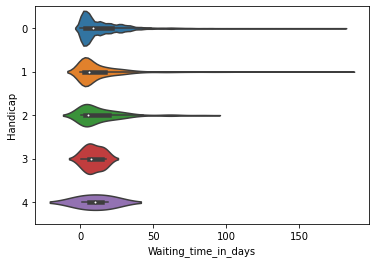

In [42]:
sb.violinplot(x=clean_df.Waiting_time_in_days,y=clean_df.Handicap)

- The non-handicap patients wait a longer time than the handicap patients and the patients with more severe disabilities do not wait too long to get attended
- As the severity of the disability increases the waiting time decreases

### What is the relationship between the scholars and the waiting time?

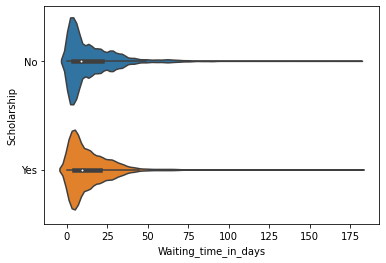

In [43]:
sb.violinplot(x=clean_df.Waiting_time_in_days,y=clean_df.Scholarship);

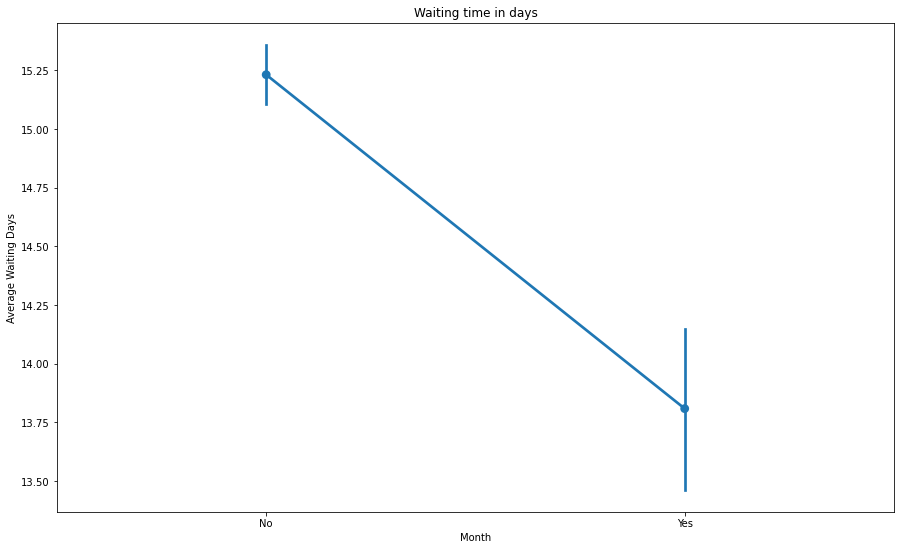

In [44]:
plt.figure(figsize=[15,9])
base_color=sb.color_palette()[3]
sb.pointplot(data = clean_df, x='Scholarship',y = 'Waiting_time_in_days', kind = 'Point')
plt.xlabel('Month')
plt.ylabel('Average Waiting Days')
plt.title('Waiting time in days');


The Scholars wait a shorter time 

### What is the relationship between the gender and waiting time?

<AxesSubplot:xlabel='Waiting_time_in_days', ylabel='Gender'>

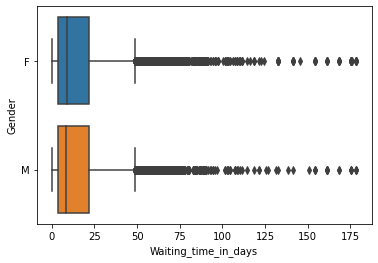

In [45]:
sb.boxplot(x=clean_df.Waiting_time_in_days,y=clean_df.Gender)

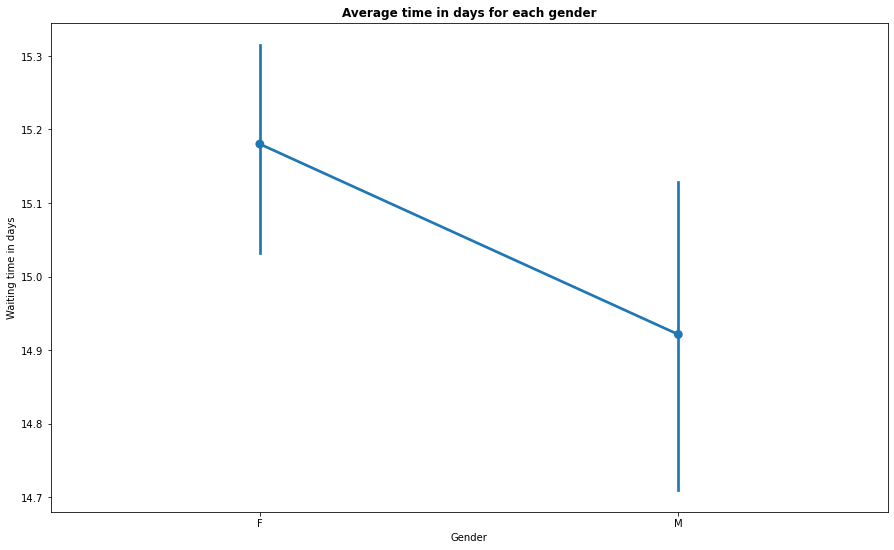

In [46]:
plt.figure(figsize=[15,9])
base_color=sb.color_palette()[3]
sb.pointplot(data = clean_df, x='Gender',y = 'Waiting_time_in_days', kind = 'Point')
plt.xlabel('Gender')
plt.ylabel('Waiting time in days')
plt.title('Average time in days for each gender',fontweight = 'bold');


Male patients spend lesser time waiting time than the female patients

### Which day of the week is the most frequent for appointments?

<AxesSubplot:xlabel='count', ylabel='Day_of_Appointment'>

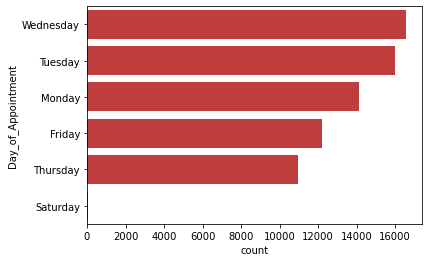

In [47]:
base_color=sb.color_palette()[3]
orders = clean_df.Day_of_Appointment.value_counts().index
sb.countplot(y='Day_of_Appointment',data = clean_df,color = base_color ,order = orders)

Wednesday is the most frequent day for appointments while very few appointments were on Saturday though there was no appointment on Sunday hinting the hospital was either closed or only open for emergencies on Sunday

### Relationship between the gender of patients and handicap patients?

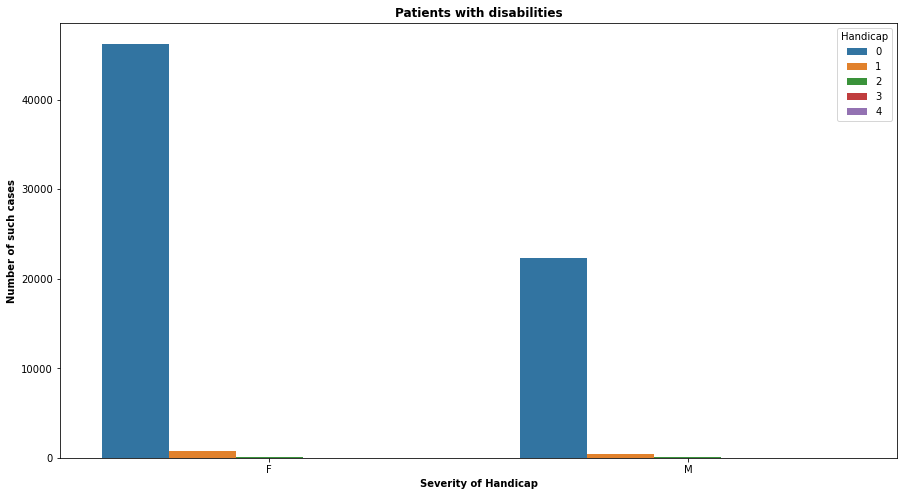

In [48]:
plt.figure(figsize=[15,8])

sb.countplot(data= clean_df ,hue ='Handicap', x='Gender');
plt.title('Patients with disabilities',y=1 ,fontweight = 'bold')
plt.xlabel('Severity of Handicap',fontweight = 'bold')
plt.ylabel('Number of such cases',fontweight = 'bold');


 Most male and female patients were not handicapped while there was still a greater number of handicapped female than male

### Which gender did not complete the medical process the most?

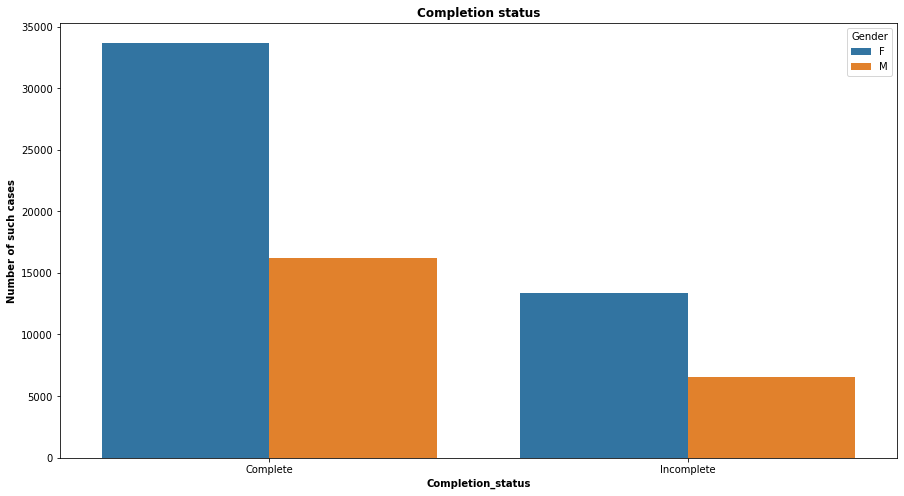

In [49]:
plt.figure(figsize=[15,8])

sb.countplot(data= clean_df ,hue ='Gender', x='Completion_status');
plt.title('Completion status',y=1 ,fontweight = 'bold')
plt.xlabel('Completion_status',fontweight = 'bold')
plt.ylabel('Number of such cases',fontweight = 'bold');


Female patients did not complete their medical process the most

### Does receiving an sms affect patient's Completion Status

<AxesSubplot:xlabel='count', ylabel='Completion_status'>

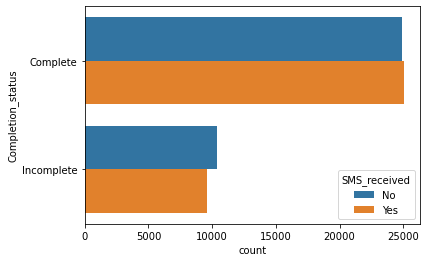

In [51]:
sb.countplot(data=clean_df,y='Completion_status',hue='SMS_received')

Patient's receiving SMS didnt really affect the completion_status of their treatments